In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**What is EDA?**
- EDA is Exploratory Data Analysis, it is a statistical method for analyzing data sets to find patterns, identify outliers, and test hypothesis.
EDA is basically to find the root cause. You can not think linearly. Fragmented approach will not work to understand the relationships between data, EDA helps to understand it holistically approach.

**Why is EDA important?**
- EDA is important to identify errors, missing values, and outliers. EDA can help identify patterns, trends and relationship with data. 
EDA can help identify abnormal events and potential risks.
EDA can help make data-driven decisions by providing insights and feedback.
EDA can help to choose the most appropriate statistical models or ML algo for analysis.

**How to do EDA?**
- Understanding the problem and the data
- Import and Inspect the data
- Handling missing values
- Perform Data Transformation
- Visualize Data Relationships 
    - Univariate Analysis - This analysis focuses on a single variable.(Histogram and density plots are typically used to visualize the distribution. Why Histogram and desity plots typically used? - These plots can show the spread, central tendency, and any skewness in the data.)
    - Bivariate Analysis - This explores the relationship between two variables. (Common visualizations include Scatter plot and Box plots).
    - Multivariate Analysis - This analysis involves examining the relationships among three or more variables. (Pair plots, Heatmaps, Faceted Grids)
- Handling Outliers - 
    - **What is outlier?** - Outliers are data points that are significatly different from the majority of other data points in a dataset. They can be higher or lower than the other values in the set.

    - **Why is handling outliers important?** - Outliers can skew the result of an analysis, can lead to misleading conclusions.
    - Identifying and handling outliers can help ensure that data analysis accurately reflecs the validity of the data.

    - **How these outliers occur?** - Outliers can be cause by human error, such as typos, rare unusual events or by technical glitches during data processing.

    - **How can outliers be identified?** - Plots can be used to identify outliers. Data points that are further than 1.5 times the interquartile range(IQR) from the lower and upper quartiles are considered outliers.

    - **What is InterQuartile range(IQR) and why to multiply with 1.5 only?** - It is a statistical measure that describes the spread of data in the middle 50% of a dataset. It is used to understand the distribution of data and finding outliers.
    The difference betweem the first quartile(Q1) and third quartile(Q3). The **1.5** factor is commonly used to identify outliers by considering data points that fall more than 1.5 times the IQR below Q1 or above Q3 as potential outliers. This value is considered a good balance, capturing significant deviations from the majority of data while not being overly sensitive to minor variations.
    This most closely follows **Gaussian distribution**.
    
- Communicate Finding and Insights


In [53]:
# reading csv file
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [54]:
# Changing the number of rows to be displayed using display.max_rows.
# Changing the number of columns to be displayed using display.max_columns.
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [55]:
# returns first 5 rows from the top
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


In [57]:
# return the dimension of dataset
df.shape

(3803, 23)

In [58]:
# Prints the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3802 non-null   object 
 1   price                3785 non-null   float64
 2   sector               3803 non-null   object 
 3   price_per_sqft       3785 non-null   float64
 4   area                 3785 non-null   float64
 5   areaWithType         3803 non-null   object 
 6   bedRoom              3803 non-null   int64  
 7   bathroom             3803 non-null   int64  
 8   balcony              3803 non-null   object 
 9   floorNum             3784 non-null   float64
 10  facing               2698 non-null   object 
 11  agePossession        3803 non-null   object 
 12  property_type        860 non-null    object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [60]:
# duplicated() - returns the boolean series of duplicate rows
# sum() - returns the sum of the values
df.duplicated().sum()

127

In [61]:
# remove the duplicate dataframe rows
df.drop_duplicates(inplace=True)

In [16]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


In [62]:
# Fill NA/NAN (missing values) with the specified method
df['property_type'].fillna('flat', inplace=True)

## Property_type

In [63]:
# returns a series containing counts of unique values
df['property_type'].value_counts()

property_type
flat     2817
house     859
Name: count, dtype: int64

<Axes: xlabel='property_type'>

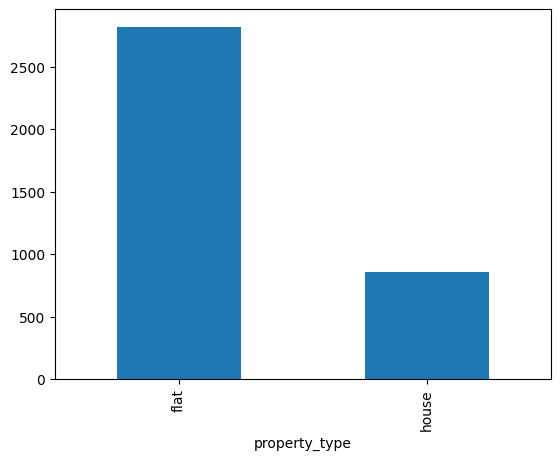

In [64]:
df['property_type'].value_counts().plot(kind='bar')

### Observations
- Flats are in majority (75%) and there are less number of houses(~25%)
- No missing values

## Society

In [25]:
df['society'].value_counts().shape

(676,)

In [26]:
df['society'].value_counts()

society
independent                                          486
tulip violet                                          75
ss the leaf                                           73
dlf new town heights                                  42
shapoorji pallonji joyville gurugram                  42
signature global park                                 35
shree vardhman victoria                               34
smart world orchard                                   32
emaar mgf emerald floors premier                      32
paras dews                                            31
dlf the ultima                                        31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
smart world gems                                      28
la vida by tata housing                               28
godrej nature plus                                    27
signature global solera

In [66]:
# value_counts returns the counts of unique values
# cumsum() returns the cummulative sum over a series or df
# why normalize=True? It converts these counts into proportions(relative frequencies). for example 
# if A appears 5 times out of 20 rows, its proportion will be 5/20 = 0.25

df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023518
ss the leaf                             0.046410
shapoorji pallonji joyville gurugram    0.059580
dlf new town heights                    0.072750
signature global park                   0.083725
shree vardhman victoria                 0.094387
smart world orchard                     0.104421
emaar mgf emerald floors premier        0.114456
paras dews                              0.124177
dlf the ultima                          0.133898
dlf regal gardens                       0.143305
m3m woodshire                           0.152712
shree vardhman flora                    0.161806
smart world gems                        0.170586
la vida by tata housing                 0.179367
signature global solera                 0.187833
godrej nature plus                      0.196300
bptp terra                              0.204139
experion the heartsong                  0.211665
emaar gurgaon greens                    0.219191
tata primant

In [29]:
society_counts = df['society'].value_counts()

# Frequency distribuition for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <=100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum(),
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

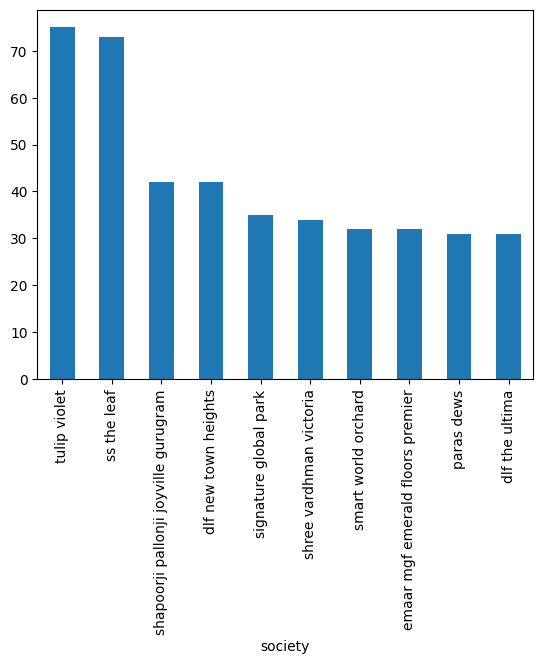

In [30]:
# top 10 societies
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [31]:
df['society'].isnull().sum()

1

In [33]:
df[df['society'].isnull()]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1683,NaN,0.06,sector 78,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,flat,NaN,1625.0,NaN,0,0,0,0,0,1,0


### Obeservations
- Around 13% properties comes under independent tag.
- There are 675 societies
- The top 75 societies have 50% of the properties and the rest 50% of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listing.
    - High (50-100): 2 societies fall in this range with 10 to 49 listings each.
    - Low(2-9): 273 societies have between 2 to 9 listings.
    - Very low(1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

## Sector

In [35]:
# unique sector
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

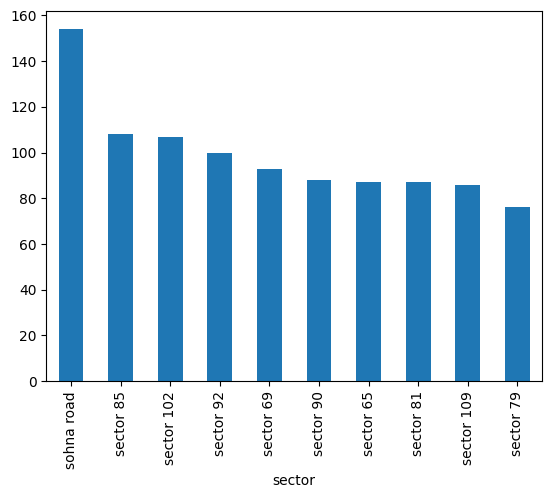

In [36]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [38]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <=100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts==1).sum()
}
sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 22,
 'Very Low (1)': 0}

### Observations
- There are a total of 104 unique sectors in the dataset
- Frequency distribution of secots:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

## Price

In [39]:
# isnull returns a boolean series detect missing values
df['price'].isnull().sum()

17

In [40]:
# Generate descriptive statistics - summarize the centeral tendency, dispersion and shape of distribution excluding NAN values
df['price'].describe()

count    3659.000000
mean        2.153282
std         3.059823
min         0.010000
25%         0.600000
50%         1.000000
75%         2.000000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

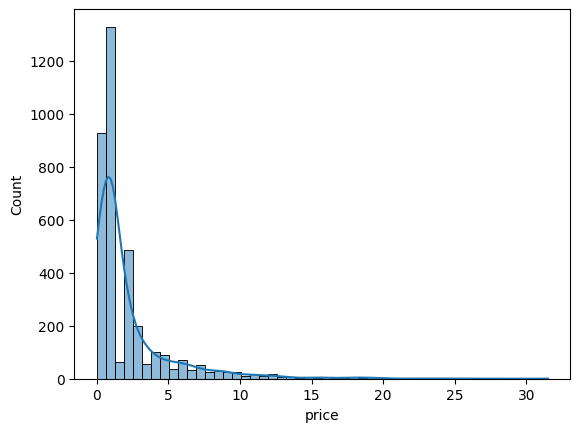

In [69]:
# plot univariate and bivariate histograms to show distributions of datasets
# kde - kernel density estimate to smooth the distribution and show on the plot as line.
sns.histplot(df['price'], kde=True, bins=50)

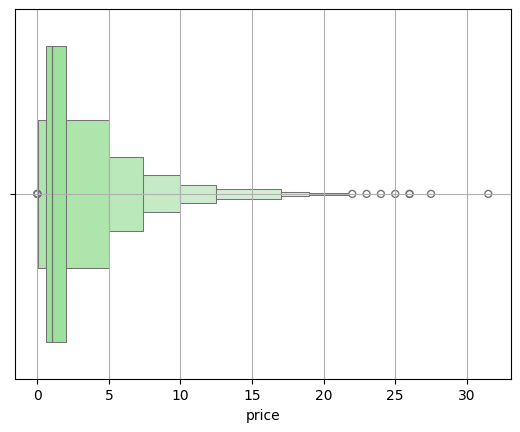

In [42]:
# draw box plot for larger datasets
sns.boxenplot(x=df['price'],color='lightgreen')
plt.grid()

#### Descriptive Statistics:
- Count: There are 3,659 non-missing price entries.
- Mean price: The average price is approximately 2.15 crores.
- Median Price: The median (or 50th percentile) price is 1.00 crores.
- Standard deviation: The prices have a standard deviation of 3.05, indicating variability in the prices.
- Range: Prices range from a minimum of 0.01 crores to maximum of 31.5 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.60 crores to 2.00 crores.

- Visualizations:
    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers.
    Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing values: there are 17 missing values in the price column.

In [43]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2284188678972976 14.466121619563058


**Skewness:** The price distribution has a skewness of approximately 3.22, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis:** The kurtosis value is approximately 14.46. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [44]:
# Quantile Analysis - Quantiles are values split sorted data or a probability distribution into equal parts
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.020
0.05     0.030
0.95     8.400
0.99    15.268
Name: price, dtype: float64

#### Quantile Analysis:
- 1% Quantile: Only 1% of properties are priced below 0.20 crores.
- 5% Quantile: Only 5% of properties are priced below 0.30 crores.
- 95% Quantile: Only 95% of properties are priced below 8.5 crores.
- 99% Quantile: Only 99% of properties are priced below 15.26 crores.


- **Why to do quantile analysis?** 
    - To understand the distribution of data beyond just the mean, allowing you to identify patterns and outliers within different proportions of a dataset, particularly when the data is skewed or has a non-normal distribution.

In [45]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.4

- **What is InterQuartile range(IQR) and why to multiply with 1.5 only?** 
    - It is a statistical measure that describes the spread of data in the middle 50% of a dataset. It is used to understand the distribution of data and finding outliers.
    The difference betweem the first quartile(Q1) and third quartile(Q3). The **1.5** factor is commonly used to identify outliers by considering data points that fall more than 1.5 times the IQR below Q1 or above Q3 as potential outliers. This value is considered a good balance, capturing significant deviations from the majority of data while not being overly sensitive to minor variations.
    
- This most closely follows **Gaussian distribution**.

In [46]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.4999999999999996 4.1


In [47]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(517, 23)

In [48]:
outliers['price'].describe()

count    517.000000
mean       8.265338
std        4.091042
min        4.120000
25%        5.500000
50%        7.000000
75%        9.500000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):
- Based on the IQR method, there are 517 properties considered as outliers.
- There outliers have an average price of approximately 8.26 crores.
- The range for these outliers is from 4.12 crores to 31.5 crores.

<Axes: xlabel='price'>

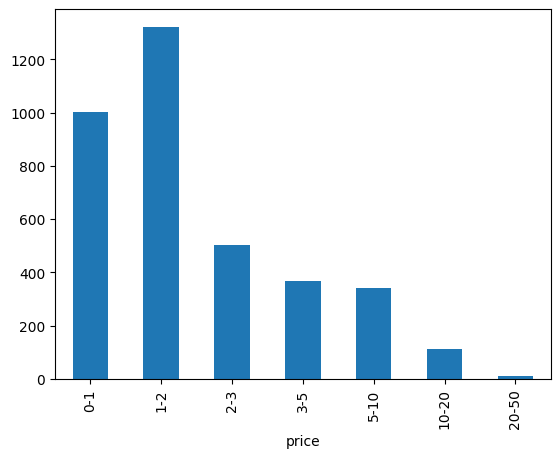

In [49]:
# Price binning
bins = [0,1,2,3,5,10,20,50]
bin_labels = ['0-1','1-2','2-3','3-5','5-10','10-20','20-50']
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There is a significant drop in the number of properties priced above "5 crores".

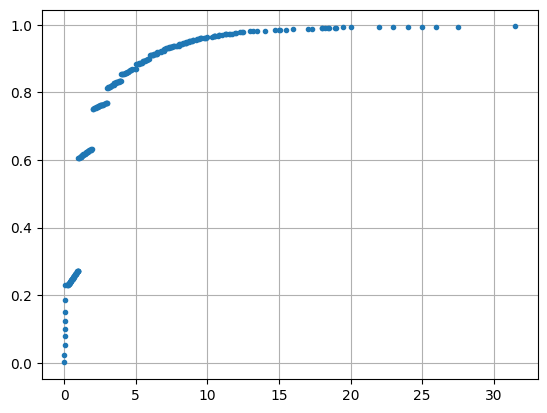

In [70]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid() 

- **ECDF** 
    - An Empirical cumulative distribution function (ECDF) plot is a graph that shows how data points are distributed from lowest to highest. 
    - It represents the proportion or count of observations falling below each unique value in a dataset.

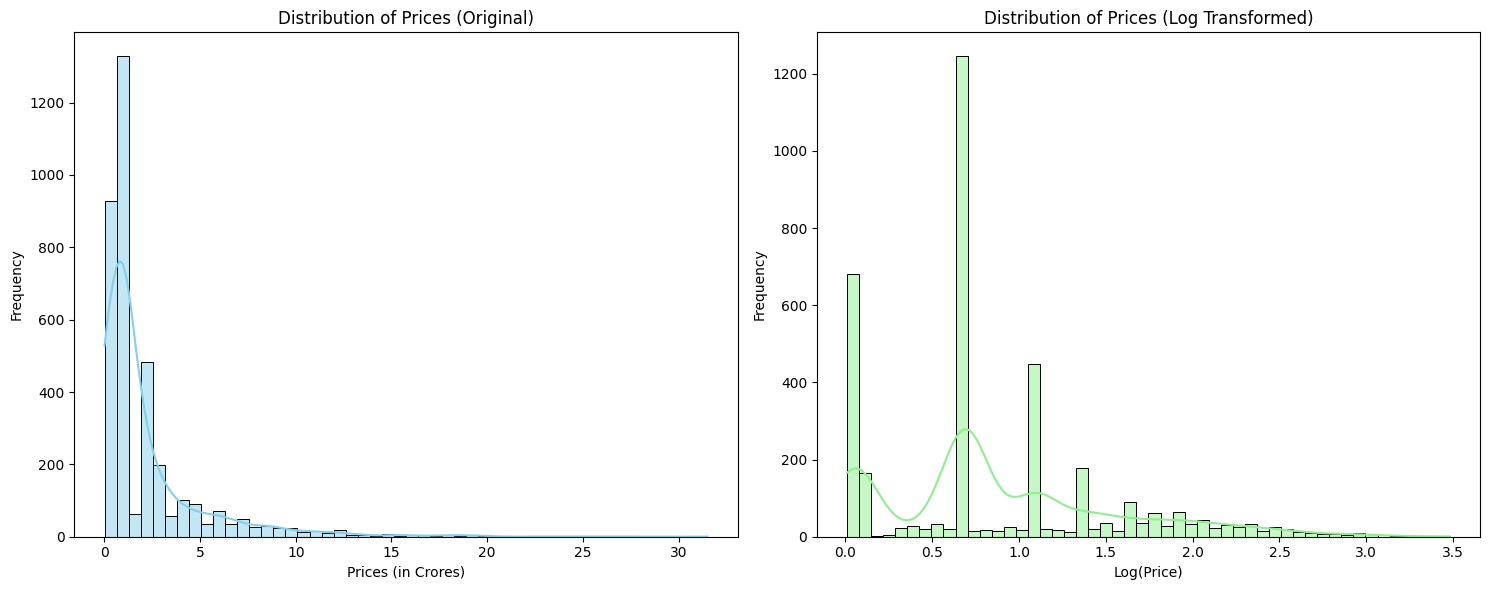

In [71]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Prices (in Crores)')
plt.ylabel('Frequency')

# Distrubution plot with log transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It is designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [72]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

0.8413903682924482 0.37990510351379125


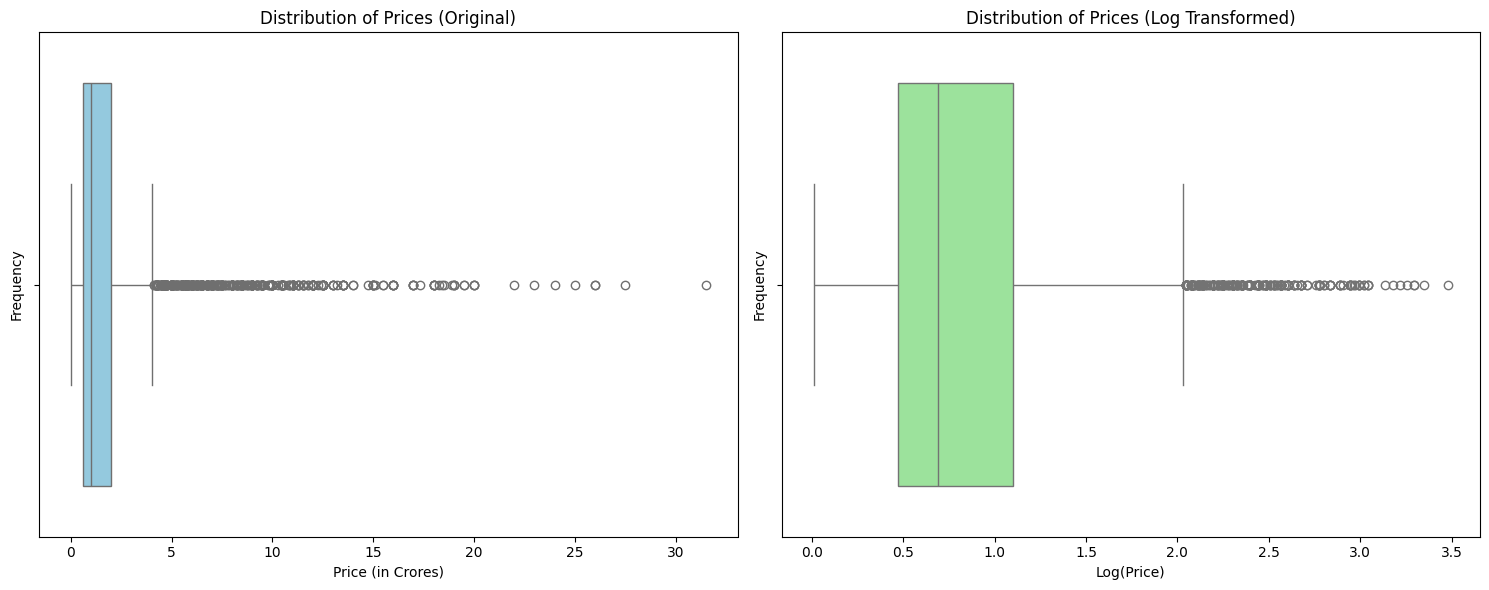

In [95]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1,2,1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1,2,2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### price_per_sqft

In [80]:
df['price_per_sqft'].isnull().sum()

17

In [81]:
df['price_per_sqft'].describe()

count      3659.000000
mean      13890.811424
std       23212.967584
min           4.000000
25%        6816.500000
50%        9020.000000
75%       13876.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

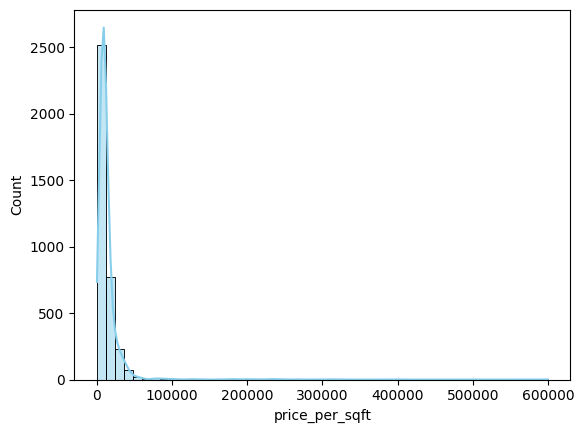

In [84]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately Rs 0 and Rs 40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

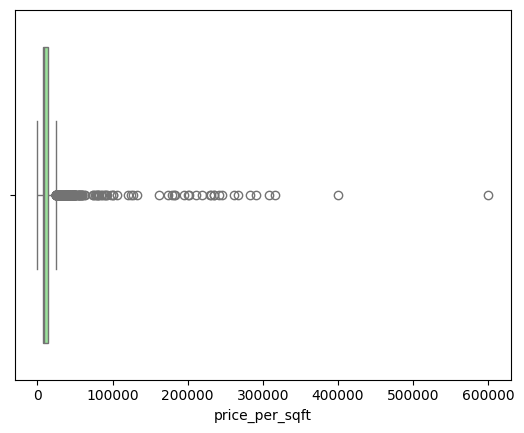

In [94]:
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range(IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations
- Potential Outliers
- Right Skewed
- 17 missing values

#### bedRoom

In [98]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

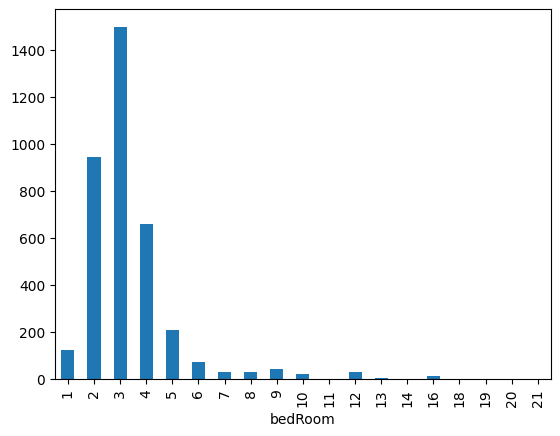

In [99]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

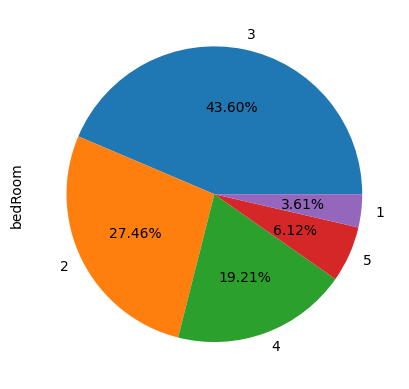

In [102]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', ylabel='bedRoom', autopct='%0.2f%%')

#### bathroom

In [103]:
df['bathroom'].isnull().sum()

0

In [104]:
df['bathroom'].value_counts()

bathroom
3     1077
2     1047
4      819
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
11       4
18       4
13       4
20       3
17       3
14       2
21       1
Name: count, dtype: int64

<Axes: xlabel='bathroom'>

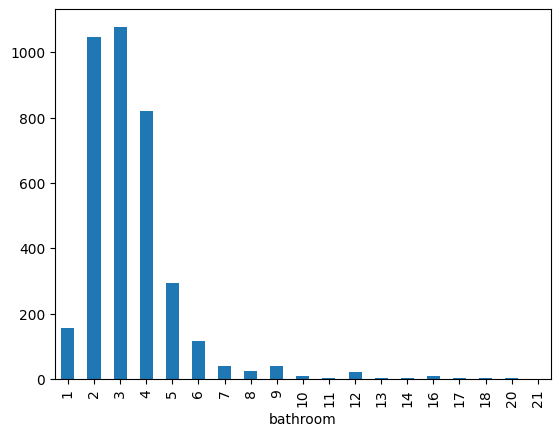

In [105]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

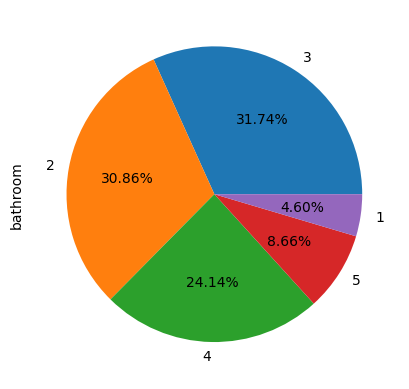

In [107]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie', ylabel='bathroom',autopct='%0.2f%%')

In [108]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


#### balcony

In [109]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

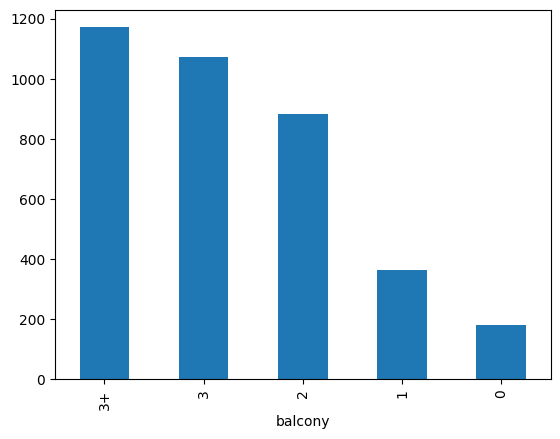

In [110]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

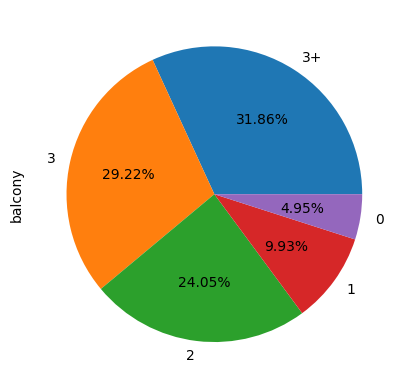

In [111]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', ylabel='balcony', autopct='%0.2f%%')

#### floorNum

In [112]:
df.iloc[:,10:].head()

,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


In [113]:
df['floorNum'].isnull().sum()

19

In [114]:
df['floorNum'].describe()

count    3657.000000
mean        6.797648
std         6.013166
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

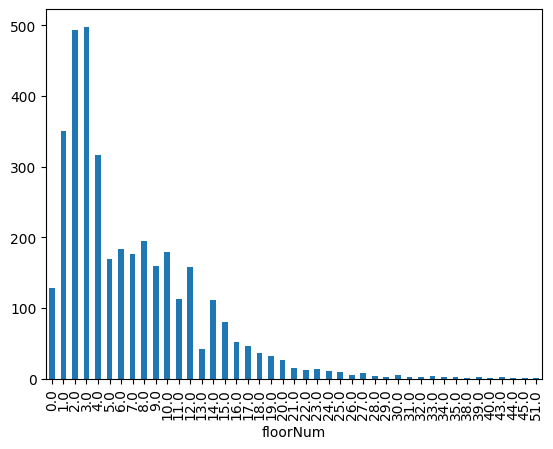

In [115]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

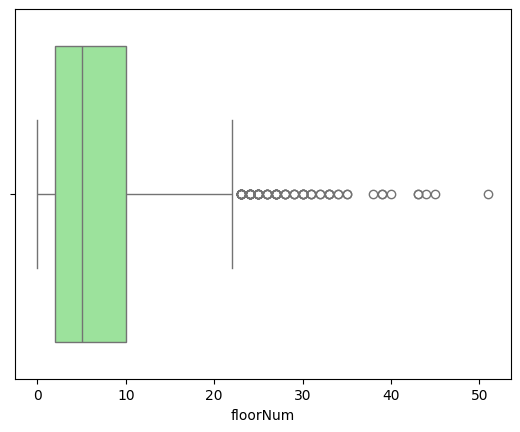

In [117]:
sns.boxplot(x=df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particulary common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. Ther interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the 'whishkers' of the box plot, especially on the higher side, indicate potential outliers.

#### facing

In [118]:
df['facing'].isnull().sum()

1044

In [119]:
df['facing'].fillna('NA',inplace=True)

In [120]:
df['facing'].value_counts()

facing
NA            1044
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

#### agePossession

In [121]:
df['agePossession'].isnull().sum()

0

In [122]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         562
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

#### areas

In [123]:
# Super built up area
df['super_built_up_area'].isnull().sum()

1802

In [124]:
df['super_built_up_area'].describe()

count     1874.000000
mean      1924.665715
std        763.974663
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

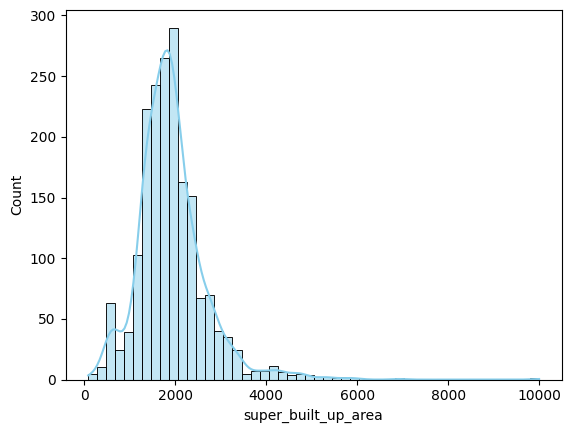

In [125]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

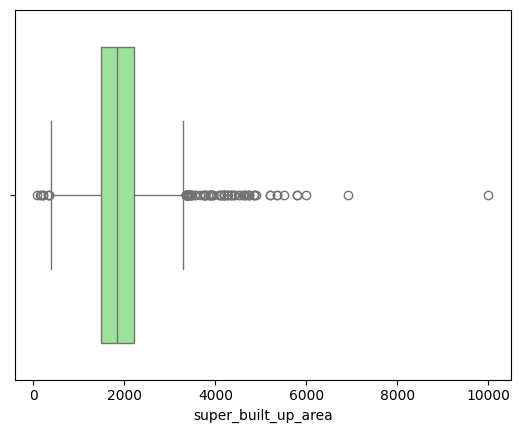

In [126]:
sns.boxplot(x=df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper 'whisker' of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [127]:
# built-up area
df['built_up_area'].isnull().sum()

1986

In [128]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585811
std       17942.880238
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

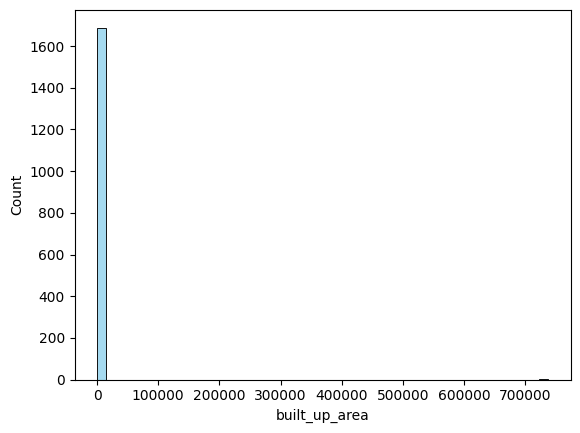

In [130]:
sns.histplot(df['built_up_area'].dropna(), bins=50, kde=False, color='skyblue')

<Axes: xlabel='built_up_area'>

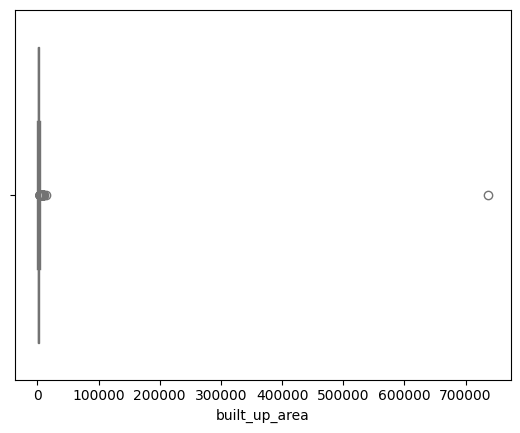

In [131]:
sns.boxplot(x=df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range(IQR) is relatively compact, but the 'whiskers' of the box plot are stretched due to the outliers.

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [132]:
# carpet area
df['carpet_area'].isnull().sum()

1804

In [133]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179578
std       22799.836442
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

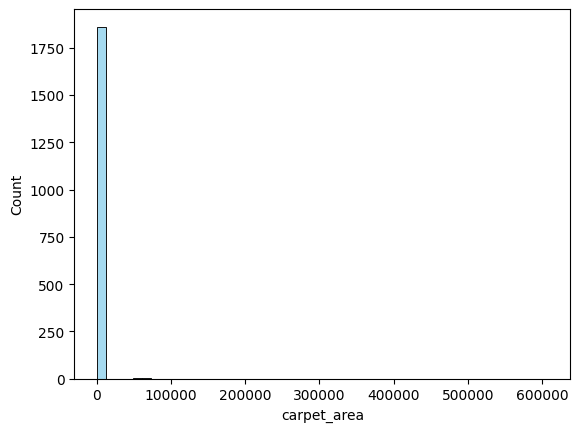

In [134]:
sns.histplot(df['carpet_area'].dropna(), bins=50, kde=False, color='skyblue')

<Axes: xlabel='carpet_area'>

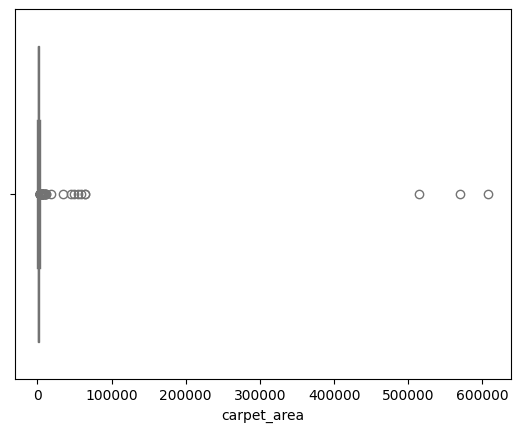

In [135]:
sns.boxplot(x=df['carpet_area'].dropna(), color='lightgreen')

In [137]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,1,0,1,0,2,49
1,1,0,0,0,0,1,29
2,1,1,1,1,0,2,160
3,1,0,0,1,0,2,165
4,0,0,0,0,0,1,61
5,1,1,1,0,0,0,83
6,0,0,0,0,0,1,0
7,1,0,0,0,0,1,97
8,0,1,0,0,0,1,72
9,0,0,0,0,0,2,61


#### additionalRooms

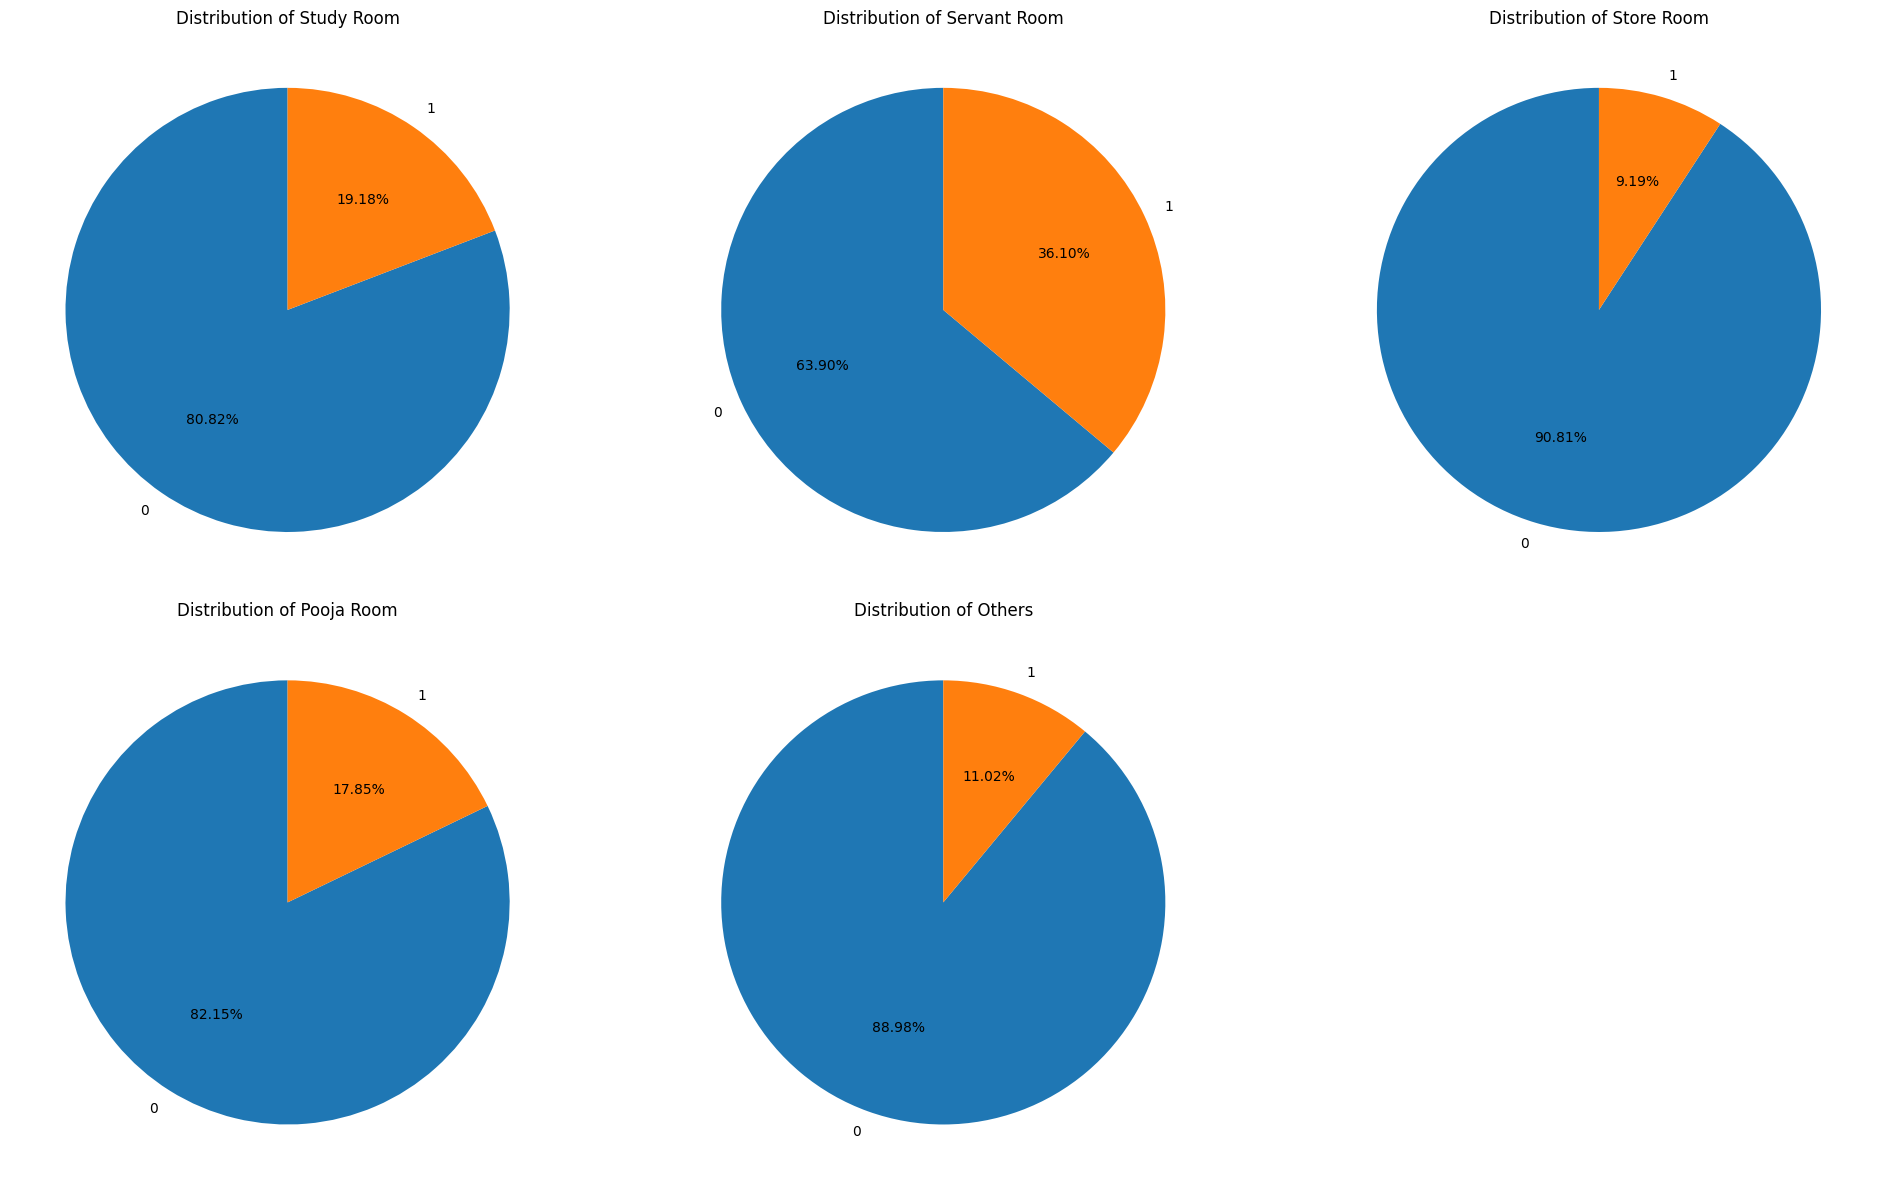

In [138]:
plt.figure(figsize=(20,12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room','others'], 1):
    ax = plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct='%0.2f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### furnishing_type

In [139]:
df['furnishing_type'].isnull().sum()

0

In [140]:
df['furnishing_type'].value_counts()

furnishing_type
1    2403
2    1063
0     210
Name: count, dtype: int64

<Axes: ylabel='count'>

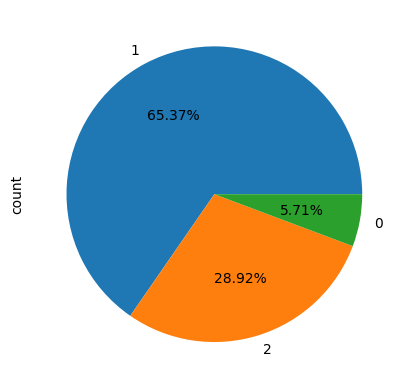

In [141]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

#### luxury_score

In [142]:
df['luxury_score'].isnull().sum()

0

In [143]:
df['luxury_score'].describe()

count    3676.000000
mean       71.530468
std        53.055626
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

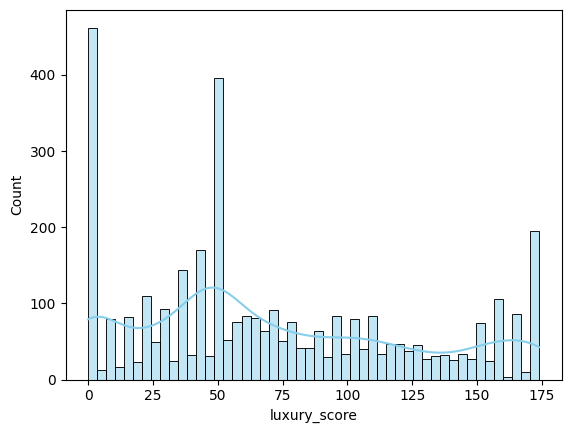

In [144]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

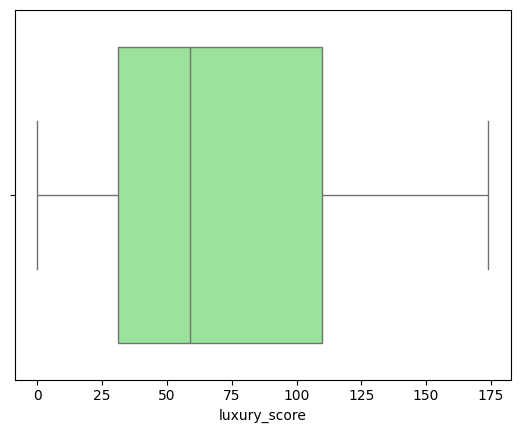

In [146]:
sns.boxplot(x=df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There is a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot revels that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range(IQR) between these values.

In [147]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NA,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61
